In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Online_Passive_Aggressive_Algorithm_definitions import passive_agrresive_algorithm
import timeit

In [2]:
df = pd.read_csv('diabetes_scale.csv')
df = df.fillna(value=0)

In [3]:
df = df.set_index('Sno',drop=True)

In [4]:
train_X = df.iloc[:,0:8]

In [5]:
train_Y = df.iloc[:,8:9]

In [6]:
train_Y = np.ravel(train_Y)

## Passive Aggresive Algorithm with Classic Update

In [7]:
start = timeit.default_timer()
pred_err_cu, weights_cu = passive_agrresive_algorithm(train_X,train_Y,type_of_update='cu')
c_cu = np.count_nonzero(pred_err_cu, axis = 0)
stop = timeit.default_timer()
print('Passive Aggressive Algorithm accuracy for classic update is: {}'.format(1 - float(c_cu) / train_X.shape[0]),'with time taken:',stop-start)

Passive Aggressive Algorithm accuracy for classic update is: 0.6861979166666667 with time taken: 0.1308328579980298


## Passive Aggressive Algorithm with First Relaxation Update

In [8]:
pred_err_fr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10]:
    start = timeit.default_timer()
    pred_err_fr, weights_fr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='fr',C=i)
    stop = timeit.default_timer()
    c_fr = np.count_nonzero(pred_err_fr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for first relaxation update is: {}'.format(1 - float(c_fr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:', stop - start)
    pred_err_fr_df.loc[i,'Accuracy']= 1 - float(c_fr) / train_X.shape[0]
    pred_err_fr_df.loc[i,'Time Taken'] = stop - start

Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6458333333333333 for C equal to: 0.0001 with time taken: 0.12697352899704129
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6458333333333333 for C equal to: 0.001 with time taken: 0.11563673600176116
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.65234375 for C equal to: 0.01 with time taken: 0.11341432399785845
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.7239583333333333 for C equal to: 0.1 with time taken: 0.11036890599643812
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6901041666666667 for C equal to: 1 with time taken: 0.10031544999947073
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.6861979166666667 for C equal to: 10 with time taken: 0.11645556800067425


Text(0.5,1,'Plot for Accuracy of Algorithm for First Relaxation Update')

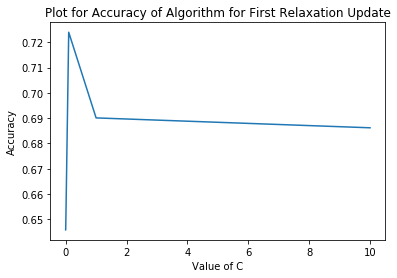

In [9]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for First Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for First Relaxation Update')

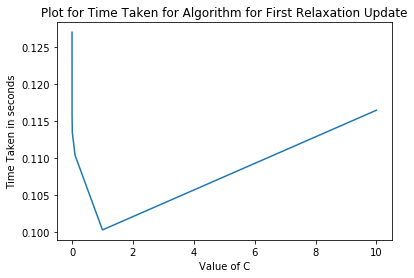

In [10]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for First Relaxation Update')

## Passive Aggressive Algorithm with Second Relaxation Update

In [11]:
pred_err_sr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10,100,200,300]:
    start = timeit.default_timer()
    pred_err_sr, weights_sr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='sr',C=i)
    stop = timeit.default_timer()
    c_sr = np.count_nonzero(pred_err_sr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for second relaxation update is: {}'.format(1 - float(c_sr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:',stop-start)
    pred_err_sr_df.loc[i,'Accuracy']= 1 - float(c_sr) / train_X.shape[0]
    pred_err_sr_df.loc[i,'Time Taken']= stop- start

Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6861979166666667 for C equal to: 0.0001 with time taken: 0.11246045100415358
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6861979166666667 for C equal to: 0.001 with time taken: 0.12356584399822168
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6875 for C equal to: 0.01 with time taken: 0.11898478199873352
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.6875 for C equal to: 0.1 with time taken: 0.11558474600315094
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.69140625 for C equal to: 1 with time taken: 0.12437928399594966
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.7200520833333333 for C equal to: 10 with time taken: 0.1248029909984325
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.7174479166666667 for C equal to: 100 with time taken: 0.11862829299934674
P

Text(0.5,1,'Plot for Accuracy of Algorithm for Second Relaxation Update')

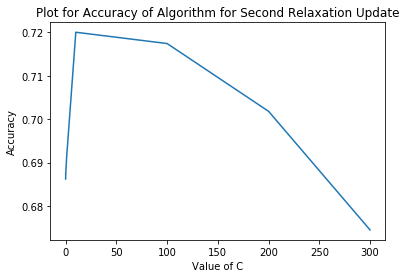

In [12]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for Second Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for Second Relaxation Update')

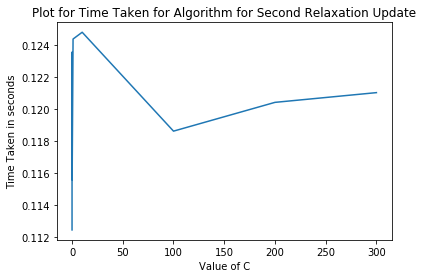

In [13]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for Second Relaxation Update')

# Introducing noise by random flipping of labels

Introducing Noise

In [14]:
noise_factor=0.3
m=int(len(train_Y)*noise_factor)

idx = np.random.choice(len(train_Y),abs(m),replace=False)
train_Y[idx]= -train_Y[idx]

### a. Passive Aggressive Algorithm with Classic Update with random flipping of labels

In [15]:
start = timeit.default_timer()
pred_err_cu, weights_cu = passive_agrresive_algorithm(train_X,train_Y,type_of_update='cu')
c_cu = np.count_nonzero(pred_err_cu, axis = 0)
stop = timeit.default_timer()
print('Passive Aggressive Algorithm accuracy for classic update is: {}'.format(1 - float(c_cu) / train_X.shape[0]),'with time taken:',stop-start)

Passive Aggressive Algorithm accuracy for classic update is: 0.5546875 with time taken: 0.13006540900096297


### b. Passive Aggressive Algorithm with First Relaxation Update with random flipping of labels

In [16]:
pred_err_fr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10]:
    start = timeit.default_timer()
    pred_err_fr, weights_fr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='fr',C=i)
    stop = timeit.default_timer()
    c_fr = np.count_nonzero(pred_err_fr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for first relaxation update is: {}'.format(1 - float(c_fr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:', stop - start)
    pred_err_fr_df.loc[i,'Accuracy']= 1 - float(c_fr) / train_X.shape[0]
    pred_err_fr_df.loc[i,'Time Taken'] = stop - start

Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5950520833333333 for C equal to: 0.0001 with time taken: 0.11564326100051403
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5950520833333333 for C equal to: 0.001 with time taken: 0.12047533599979943
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5950520833333333 for C equal to: 0.01 with time taken: 0.12017539000225952
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5807291666666667 for C equal to: 0.1 with time taken: 0.12881498799833935
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5455729166666667 for C equal to: 1 with time taken: 0.11586395199992694
Passive Aggressive Algorithm accuracy for first relaxation update is: 0.5546875 for C equal to: 10 with time taken: 0.110441095996066


Text(0.5,1,'Plot for Accuracy of Algorithm for First Relaxation Update')

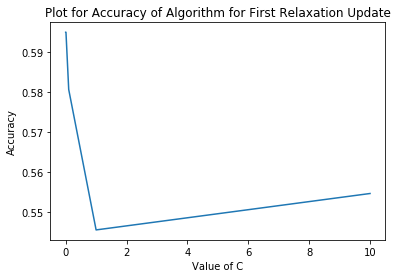

In [17]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for First Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for First Relaxation Update')

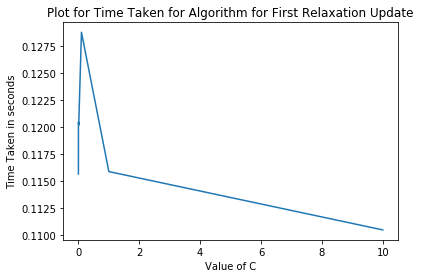

In [18]:
plt.plot(pred_err_fr_df.index,pred_err_fr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for First Relaxation Update')

### c. Passive Aggressive Algorithm with Second Relaxation Update with random flipping of labels

In [19]:
pred_err_sr_df = pd.DataFrame(columns=['Accuracy','Time Taken'])
for i in [0.0001,0.001,0.01,0.1,1,10,100,200,300]:
    start = timeit.default_timer()
    pred_err_sr, weights_sr = passive_agrresive_algorithm(train_X,train_Y,type_of_update='sr',C=i)
    stop = timeit.default_timer()
    c_sr = np.count_nonzero(pred_err_sr, axis = 0)
    
    print('Passive Aggressive Algorithm accuracy for second relaxation update is: {}'.format(1 - float(c_sr) / train_X.shape[0])
          ,'for C equal to:',i,'with time taken:',stop-start)
    pred_err_sr_df.loc[i,'Accuracy']= 1 - float(c_sr) / train_X.shape[0]
    pred_err_sr_df.loc[i,'Time Taken']= stop- start

Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5546875 for C equal to: 0.0001 with time taken: 0.12534548099938547
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5546875 for C equal to: 0.001 with time taken: 0.11025608699856093
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5533854166666667 for C equal to: 0.01 with time taken: 0.12738654400163796
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.55859375 for C equal to: 0.1 with time taken: 0.10504157499963185
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5559895833333333 for C equal to: 1 with time taken: 0.12133820799499517
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.546875 for C equal to: 10 with time taken: 0.10826136799732922
Passive Aggressive Algorithm accuracy for second relaxation update is: 0.5872395833333333 for C equal to: 100 with time taken: 0.11132071699830703
Pass

Text(0.5,1,'Plot for Accuracy of Algorithm for Second Relaxation Update')

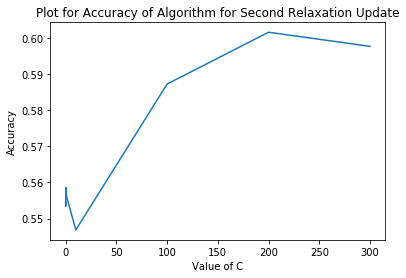

In [20]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Accuracy'])
plt.xlabel('Value of C')
plt.ylabel('Accuracy')
plt.title('Plot for Accuracy of Algorithm for Second Relaxation Update')

Text(0.5,1,'Plot for Time Taken for Algorithm for Second Relaxation Update')

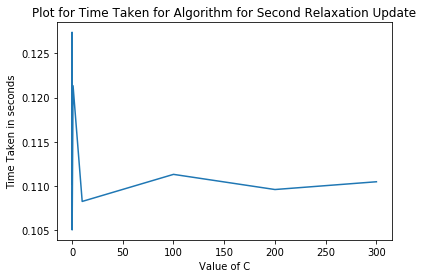

In [21]:
plt.plot(pred_err_sr_df.index,pred_err_sr_df['Time Taken'])
plt.xlabel('Value of C')
plt.ylabel('Time Taken in seconds')
plt.title('Plot for Time Taken for Algorithm for Second Relaxation Update')